In [183]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [184]:
#for not being able to get a dataset which is difficult to classify, I'm using sklearns make_classification function 
# to generate an artificial dataset with less separation between the classes
X, y = make_classification(n_samples=1000, 
    n_features=15, 
    n_redundant = 3,
    n_informative = 3,
    n_repeated = 3,
    n_classes = 2,
    n_clusters_per_class = 1,
    class_sep=1, 
    flip_y=0.1,
    random_state=1) 

In [185]:
df = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'x3':X[:,2], 'x4':X[:,3], 'x5':X[:,4], 'x6':X[:,5], 'x7':X[:,6], 'x8':X[:,7], 'x9':X[:,8], 'x10':X[:,9], 'x11':X[:,10], 'x12':X[:,11], 'x13':X[:,12], 'x14':X[:,13],  'y':y})
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,y
0,-0.571098,-1.124475,1.281692,0.378703,0.319393,-0.071018,0.545468,-0.820726,0.378703,0.403124,0.844252,-0.259806,-1.124475,1.281692,1
1,-0.613953,2.209429,0.806659,1.117077,0.286030,-2.424761,1.055912,-0.245105,1.117077,-0.198637,0.695802,1.112393,2.209429,0.806659,0
2,0.988392,0.724505,1.075930,2.570427,-1.592848,-2.864625,-1.677410,-0.962224,2.570427,0.298895,0.953330,0.151229,0.724505,1.075930,0
3,-1.515234,-0.806798,-0.940911,1.902523,-1.172722,-0.820744,1.188514,-0.203722,1.902523,0.377800,-0.481897,-0.208043,-0.806798,-0.940911,1
4,-0.614050,-0.720418,-3.628492,1.506552,0.274097,0.288500,-1.336014,1.040855,1.506552,0.887438,-2.287146,0.274643,-0.720418,-3.628492,1
5,0.756606,1.528314,0.854282,1.107472,0.253215,-2.045130,0.104178,-0.376451,1.107472,-1.320498,0.705661,0.111112,1.528314,0.854282,0
6,-0.550429,2.325404,0.761637,0.924118,-0.881458,-2.317436,-0.965297,-0.159526,0.924118,0.848452,0.653018,0.445428,2.325404,0.761637,0
7,-1.330772,-1.313907,-1.240596,0.901158,-0.654462,0.385847,-0.255923,0.083252,0.901158,0.540258,-0.781287,-0.703787,-1.313907,-1.240596,1
8,0.179628,-1.595525,-0.775521,1.280653,0.234199,0.088637,-0.091665,-0.252749,1.280653,0.381944,-0.450265,-0.583260,-1.595525,-0.775521,1
9,-0.411866,-1.708540,-1.755641,0.488332,1.404690,1.109701,0.315793,0.335677,0.488332,2.099934,-1.168756,-1.691013,-1.708540,-1.755641,1


In [186]:
import seaborn as sb
%config InlineBackend.figure_format = 'svg'
#Correlation heatmap for dataset
#plt.figure(figsize = (10,5))
#heat = sb.heatmap(df.corr(),annot=True, fmt='.2f')

In [187]:
#m = list(df.columns)
#sb.pairplot(df, height=3,vars=m[0:7],hue="y",palette="husl")

In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

/Users/vish/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


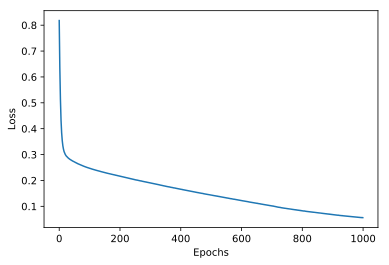

Confusion Matrix:

 [[86 15]
 [ 8 91]]


Classification Report:

               precision    recall  f1-score   support

           0       0.91      0.85      0.88       101
           1       0.86      0.92      0.89        99

   micro avg       0.89      0.89      0.89       200
   macro avg       0.89      0.89      0.88       200
weighted avg       0.89      0.89      0.88       200

Accuracy:88.50%
Misclassified samples: 23


In [189]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000,random_state=1)
mlp.fit(X_train_std,y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test_std)

print('Confusion Matrix:\n\n', confusion_matrix(y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != predictions).sum())

In [190]:
from sklearn.decomposition import PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([3.55323824e-01, 1.53133428e-01, 9.58144945e-02, 7.26215061e-02,
       6.91894816e-02, 6.63322297e-02, 6.49743461e-02, 6.25874477e-02,
       6.00232422e-02, 6.16661962e-33, 5.11476599e-33, 2.20531557e-33,
       8.97191652e-34, 4.17334293e-34, 1.13466841e-34])

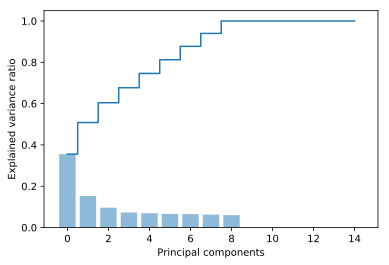

In [191]:
plt.bar(range(0, 15), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(0, 15), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

In [192]:
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
pca.explained_variance_ratio_

array([0.35532382, 0.15313343, 0.09581449])

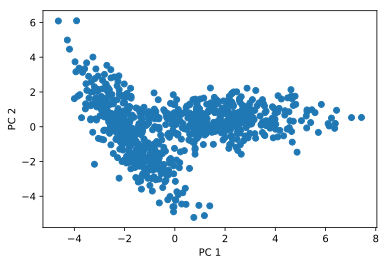

In [193]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

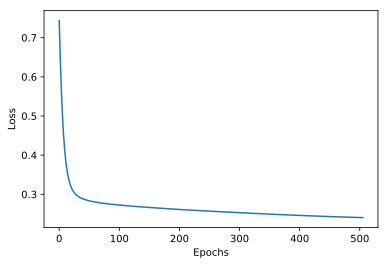

Confusion Matrix:

 [[95  6]
 [ 4 95]]


Classification Report:

               precision    recall  f1-score   support

           0       0.96      0.94      0.95       101
           1       0.94      0.96      0.95        99

   micro avg       0.95      0.95      0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200

Accuracy:95.00%
Misclassified samples: 10


In [194]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000,random_state=1)
mlp.fit(X_train_pca,y_train)
plt.plot(mlp.loss_curve_)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

predictions = mlp.predict(X_test_pca)

print('Confusion Matrix:\n\n', confusion_matrix(y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != predictions).sum())

In [197]:
print(pd.DataFrame(pca.components_,columns=df.columns,index = ['PC-1','PC-2','PC-3']))

            x1        x2        x3        x4        x5        x6        x7  \
PC-1  0.004286 -0.316828 -0.394060 -0.154262 -0.003131  0.390865 -0.010320   
PC-2  0.063064 -0.222619 -0.175510  0.609734  0.001959 -0.189491 -0.051438   
PC-3 -0.030927 -0.474604  0.253023 -0.093812 -0.116074  0.252158  0.232161   

            x8        x9       x10       x11       x12       x13       x14  \
PC-1  0.344938 -0.154262  0.025352 -0.409715 -0.025859 -0.316828 -0.394060   
PC-2 -0.194810  0.609734  0.002935 -0.121152  0.021083 -0.222619 -0.175510   
PC-3 -0.424978 -0.093812  0.149146  0.212950 -0.139075 -0.474604  0.253023   

             y  
PC-1  0.002992  
PC-2  0.010397  
PC-3 -0.066381  


In [377]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.datasets import make_circles

In [378]:
X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=1)

In [379]:
kp = pd.DataFrame({'x1':X[:,0], 'x2':X[:,1], 'y':y})
kp

,x1,x2,y
0,0.323139,-0.043065,1
1,-0.688313,-0.669704,0
2,-0.250650,-0.218973,1
3,-0.206483,-0.304696,1
4,0.660952,-0.840442,0
5,-0.047163,-0.302951,1
6,0.984306,-0.075124,0
7,-0.293873,0.076366,1
8,0.701377,0.789994,0
9,-0.296215,0.105934,1


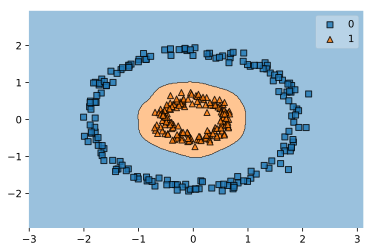

In [380]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_train_std, y_train, 
                      clf=svm)

In [382]:
predictions = svm.predict(X_test)
print('Confusion Matrix:\n\n', confusion_matrix(y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != predictions).sum())

Confusion Matrix:

 [[13 21]
 [ 0 46]]


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.38      0.55        34
           1       0.69      1.00      0.81        46

   micro avg       0.74      0.74      0.74        80
   macro avg       0.84      0.69      0.68        80
weighted avg       0.82      0.74      0.70        80

Accuracy:73.75%
Misclassified samples: 21


In [383]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True, gamma=10)
X_kpca = kpca.fit_transform(X)

In [384]:
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_kpca.shape[1])

Original number of features: 2
Reduced number of features: 388


Text(0,0.5,'$x_2$')

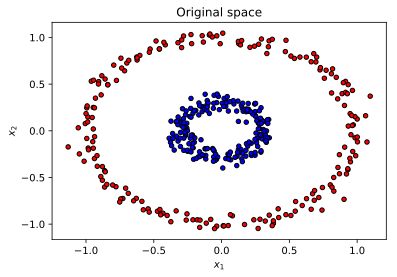

In [385]:
plt.figure()
#plt.subplot(2, 2, 1, aspect='equal')
plt.title("Original space")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

Text(0,0.5,'2nd component')

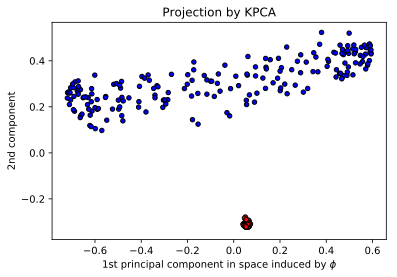

In [386]:
#plt.subplot(2, 2, 3, aspect='equal')
plt.scatter(X_kpca[reds, 0], X_kpca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_kpca[blues, 0], X_kpca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

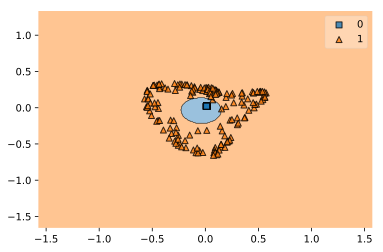

In [388]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)
skpca = KernelPCA(n_components=2, kernel='rbf', gamma=15, random_state=1)
X_train_kpca = skpca.fit_transform(X_train_std)
X_test_kpca = skpca.fit_transform(X_test_std)
svm = SVC(kernel='rbf', gamma=10.0, C=1.0, random_state=1)
svm.fit(X_train_kpca, y_train)
plot_decision_regions(X_train_kpca, y_train, 
                      clf=svm)

In [389]:
predictions = svm.predict(X_test_kpca)
print('Confusion Matrix:\n\n', confusion_matrix(y_test,predictions))
print("\n")
print('Classification Report:\n\n',classification_report(y_test,predictions,target_names=['0','1']))
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:%.2f%%" %(accuracy*100.0))
print('Misclassified samples: %d' % (y_test != predictions).sum())

Confusion Matrix:

 [[43  0]
 [ 5 32]]


Classification Report:

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.86      0.93        37

   micro avg       0.94      0.94      0.94        80
   macro avg       0.95      0.93      0.94        80
weighted avg       0.94      0.94      0.94        80

Accuracy:93.75%
Misclassified samples: 5
